In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import scipy.stats as stats


# Model Selection and Finishing up Model 1: MLR

In the model_1_dev notebook we did extensive data exploration, created a PCA model and Multiple Linear Regression Model, and more. In this notebook we will perform model selection and finish the model building process. 

In [3]:
df = pd.read_csv("mlr_data.csv")

### Creating the Model and Checking Assumptions (Again)

We will remove train, test split this time as opposed to the dev notebook!

In [4]:
# Original features 
features = ['Squad_Size_Normalized_by_Avg', 'Average_Market_Value_Normalized_by_Avg', 'Number_of_Foreigners_Normalized_by_Avg']

X = df[features]
y = df['Points']


# Split train-test
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42
# )

# Fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# Predict
y_pred = lr.predict(X)

# Evaluate
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
print(f"R² (original features): {r2:.3f}")
print(f"RMSE (original features): {rmse:.3f}")

R² (original features): 0.713
RMSE (original features): 9.483


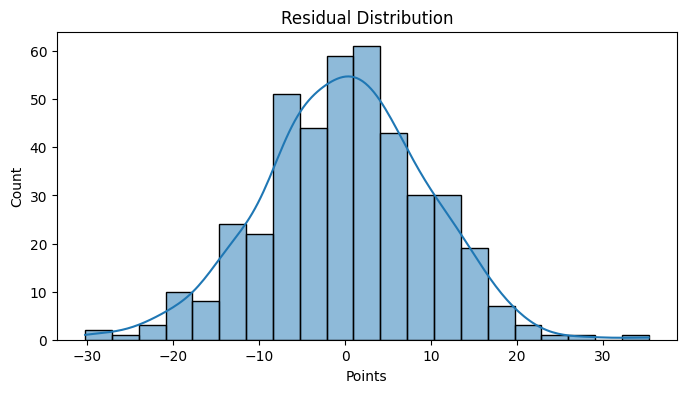

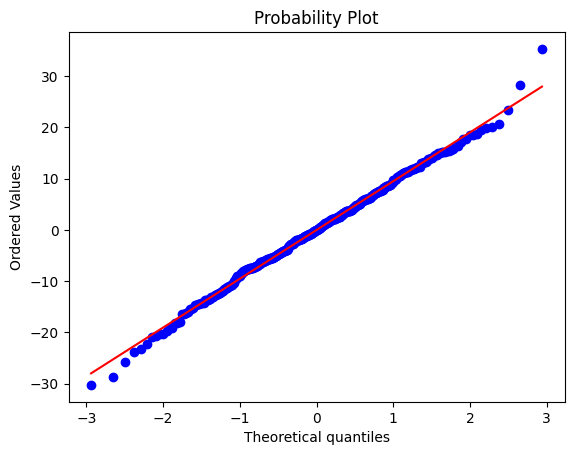

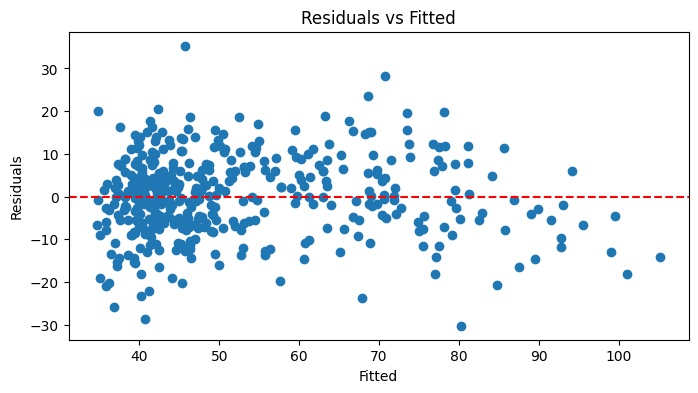

In [5]:
# Feature Based Linear Regression Model
residuals = y - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# Residual vs Predicted
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

### Getting Coefficients, P-Values, and Model Evaluation

In [7]:
# Weights of the non pca model
intercept = lr.intercept_
coefficients = lr.coef_

print("Model Coefficients (Weights):")
print(f"Intercept: {intercept:.4f}")
print()

if isinstance(X, pd.DataFrame):
    for feature, coef in zip(X.columns, coefficients):
        print(f"{feature:20s}: {coef:.4f}")
else:
    for i, coef in enumerate(coefficients):
        print(f"Feature {i:2d}: {coef:.4f}")

Model Coefficients (Weights):
Intercept: 22.9208

Squad_Size_Normalized_by_Avg: 8.3198
Average_Market_Value_Normalized_by_Avg: 23.0499
Number_of_Foreigners_Normalized_by_Avg: -1.9762


In [8]:
# Split variable names for lr: X_train, X_test, y_train, y_test 

y_pred = lr.predict(X)
residuals = y - y_pred

# IMPORTANT: Make sure X_train is a numpy array or DataFrame (not with intercept already)
if hasattr(X, 'values'):
    X_array = X.values
else:
    X_array = X

print(f"X_train shape: {X_array.shape}")
print(f"Number of features: {X_array.shape[1]}")

# MSE
n_features = X_array.shape[1]
mse = np.sum(residuals**2) / (len(y) - n_features - 1)

# SE
X_with_intercept = np.column_stack([np.ones(len(X_array)), X_array])
var_coef = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept).diagonal()
se = np.sqrt(var_coef)

# shape and concatenation fixing
print(f"Intercept shape: {np.array([lr.intercept_]).shape}")
print(f"Coef shape: {lr.coef_.shape}")
print(f"SE shape: {se.shape}")

coefs = np.concatenate([[lr.intercept_], lr.coef_.flatten()])
print(f"Coefs shape: {coefs.shape}")

# t-stats and p-values
t_stats = coefs / se
df = len(y) - len(coefs)  # degrees of freedom
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df))

# Display results
feature_names = ['Intercept'] + list(X.columns) if hasattr(X, 'columns') else ['Intercept'] + [f'Feature_{i}' for i in range(len(lr.coef_))]

results_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Std Error': se,
    't-statistic': t_stats,
    'p-value': p_values
})

print("\n" + "="*60)
print("LINEAR REGRESSION RESULTS")
print("="*60)
print(results_df.to_string(index=False))

X_train shape: (420, 3)
Number of features: 3
Intercept shape: (1,)
Coef shape: (3,)
SE shape: (4,)
Coefs shape: (4,)

LINEAR REGRESSION RESULTS
                               Feature  Coefficient  Std Error  t-statistic      p-value
                             Intercept    22.920774   3.902112     5.873941 8.721178e-09
          Squad_Size_Normalized_by_Avg     8.319773   4.788217     1.737551 8.302995e-02
Average_Market_Value_Normalized_by_Avg    23.049912   0.735556    31.336720 0.000000e+00
Number_of_Foreigners_Normalized_by_Avg    -1.976172   2.866247    -0.689463 4.909161e-01


The multiple linear regression model revealed that Average Market Value was the strongest predictor (β = 22.79, SE = 0.83, p < 0.001). Squad Size showed a positive trend (β = 10.58, SE = 5.77, p = 0.068) approaching statistical significance. However, Number of Foreigners was not a significant predictor (β = -3.05, SE = 3.44, p = 0.375).

### Creating a MLR Model without Number_of_Foreigners

In [11]:
df = pd.read_csv("mlr_data.csv")
# Original features 
features = ['Squad_Size_Normalized_by_Avg', 'Average_Market_Value_Normalized_by_Avg']

X = df[features]
y = df['Points']


# # Split train-test
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42
# )

# Fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# Predict
y_pred = lr.predict(X)

# Evaluate
r2 = r2_score(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
print(f"R² (original features): {r2:.3f}")
print(f"RMSE (original features): {rmse:.3f}")

R² (original features): 0.712
RMSE (original features): 9.488


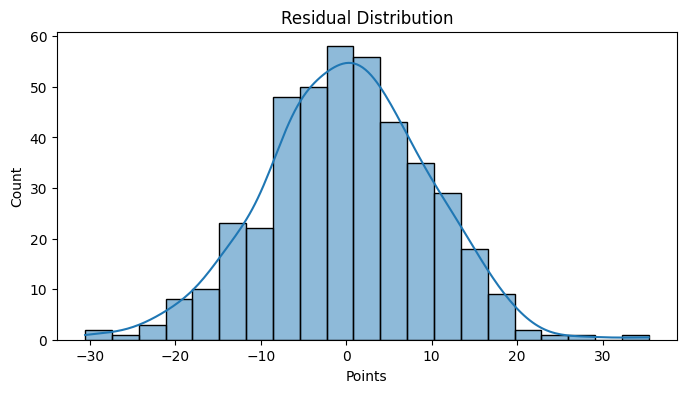

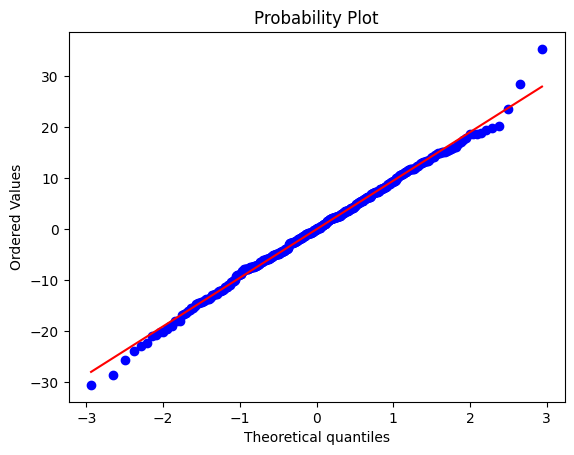

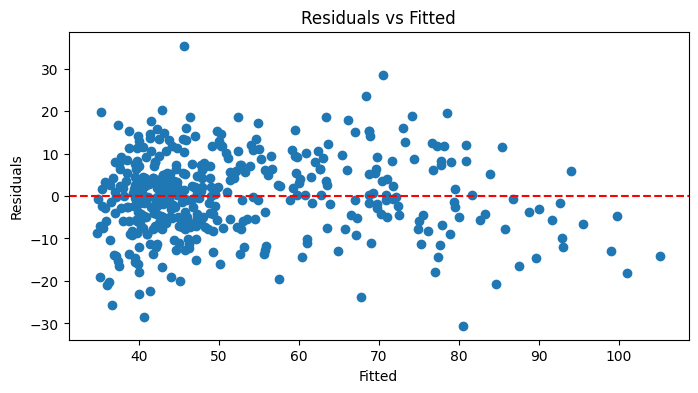

In [12]:
# Feature Based Linear Regression Model
residuals = y - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

# Residual vs Predicted
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

In [13]:
# Weights of the non pca model
intercept = lr.intercept_
coefficients = lr.coef_

print("Model Coefficients (Weights):")
print(f"Intercept: {intercept:.4f}")
print()

if isinstance(X, pd.DataFrame):
    for feature, coef in zip(X.columns, coefficients):
        print(f"{feature:20s}: {coef:.4f}")
else:
    for i, coef in enumerate(coefficients):
        print(f"Feature {i:2d}: {coef:.4f}")

Model Coefficients (Weights):
Intercept: 23.0456

Squad_Size_Normalized_by_Avg: 6.3327
Average_Market_Value_Normalized_by_Avg: 22.9360


In [14]:
# Split variable names for lr: X_train, X_test, y_train, y_test 

y_pred = lr.predict(X)
residuals = y - y_pred

# IMPORTANT: Make sure X_train is a numpy array or DataFrame (not with intercept already)
if hasattr(X, 'values'):
    X_array = X.values
else:
    X_array = X

print(f"X_train shape: {X_array.shape}")
print(f"Number of features: {X_array.shape[1]}")

# MSE
n_features = X_array.shape[1]
mse = np.sum(residuals**2) / (len(y) - n_features - 1)

# SE
X_with_intercept = np.column_stack([np.ones(len(X_array)), X_array])
var_coef = mse * np.linalg.inv(X_with_intercept.T @ X_with_intercept).diagonal()
se = np.sqrt(var_coef)

# shape and concatenation fixing
print(f"Intercept shape: {np.array([lr.intercept_]).shape}")
print(f"Coef shape: {lr.coef_.shape}")
print(f"SE shape: {se.shape}")

coefs = np.concatenate([[lr.intercept_], lr.coef_.flatten()])
print(f"Coefs shape: {coefs.shape}")

# t-stats and p-values
t_stats = coefs / se
df = len(y) - len(coefs)  # degrees of freedom
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df))

# Display results
feature_names = ['Intercept'] + list(X.columns) if hasattr(X, 'columns') else ['Intercept'] + [f'Feature_{i}' for i in range(len(lr.coef_))]

results_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs,
    'Std Error': se,
    't-statistic': t_stats,
    'p-value': p_values
})

print("\n" + "="*60)
print("LINEAR REGRESSION RESULTS")
print("="*60)
print(results_df.to_string(index=False))

X_train shape: (420, 2)
Number of features: 2
Intercept shape: (1,)
Coef shape: (2,)
SE shape: (3,)
Coefs shape: (3,)

LINEAR REGRESSION RESULTS
                               Feature  Coefficient  Std Error  t-statistic      p-value
                             Intercept    23.045589   3.895457     5.916016 6.882208e-09
          Squad_Size_Normalized_by_Avg     6.332735   3.821343     1.657201 9.823089e-02
Average_Market_Value_Normalized_by_Avg    22.935962   0.716297    32.020196 0.000000e+00


Conclusions
- Using the simpler linear regression model with Squad Size and Average Market Value as predictors seems like the most ideal model. 
- Also its more simple which makes it a better option due to Occams Razor


Questions/Ideas
- is this the end of "model selection'

How to Further Improve MLR
1. Get more data!
- Issue: We need data that needs to be there at the START of the season. Ex: All data points used in the model to predict the 2025-26 season need to be present in August 2025 (at the beginning of the season).
- Possible Soltuion: Use performance statistics from the end of the previous season as a feature. This may or may not work but its the only other data that we have before the season starts!


Model 2 - Mixed Effects 
1. "Team" Effect is important
2. How to model "Player" Effect??